2024-06-06 15:57:58.916829: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-06 15:57:58.917196: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-06 15:57:58.919995: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-06 15:57:58.955288: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-06 15:57:59.606416: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

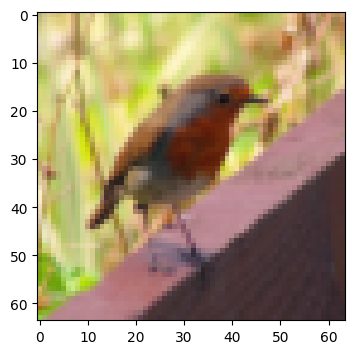

y = 0. It's a non-cat picture.
Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)
train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [1]:
import time
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from tools.catvnoncat_utils import * 
from tools.catvnoncat_tensorflow_utils import tensorflow_model
from tools.catvnoncat_tensorflow_utils import predict as tensorflow_predict

plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


np.random.seed(1)

# load data
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()
layers_dims = [12288, 20, 7, 5, 1]   #  4-layer model

# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
plt.show()
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))


# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255
test_x = test_x_flatten/255

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

# Use your model
# parameters = L_layer_model(train_x, train_y, layers_dims, learning_rate = 0.0001, num_epochs = 2500, print_cost = True)
# pred_train = predict(train_x, train_y, parameters)
# pred_test = predict(test_x, test_y, parameters)

# # Results analysis
# print_mislabeled_images(classes, test_x, test_y, pred_test)

# Use tensorflow
parameters = tensorflow_model(train_x, train_y, layers_dims, learning_rate = 0.0001, num_epochs = 1500, minibatch_size = 16, print_cost = True)
print ("training set:")
pred_train = tensorflow_predict(train_x, train_y, parameters)
print ("test set:")
pred_test = tensorflow_predict(test_x, test_y, parameters)